## <font color='darkblue'>Analyze A/B Test Results</font>

<font color='darkblue'>This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!</font>

## <font color='darkblue'> Table of Contents</font>
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)



<a id='intro'></a>
### <font color='darkblue'> Introduction</font>

<font color='darkblue'>A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these.</font> 

<font color='darkblue'>For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.</font>

<font color='darkblue'>**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).</font>

<a id='probability'></a>
#### <font color='darkblue'>Part I - Probability</font>

<font color='darkblue'>To get started, let's import our libraries.</font>

In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

<font color='darkblue'>`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**</font>

<font color='darkblue'>a. Read in the dataset and take a look at the top few rows here:</font>

In [117]:
# Data is loaded and the first five information is displayed
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


<font color='darkblue'>b. Use the below cell to find the number of rows in the dataset.</font>

In [118]:
df.shape[0]

294478

In [119]:
#Display data type
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [120]:
type(df['timestamp'][0])# needs to be converted to date datatype

str

In [121]:
#change timestamp to datetime
df['timestamp']=pd.to_datetime(df['timestamp'])

<font color='darkblue'>c. The number of unique users in the dataset.</font>

In [122]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

<font color='darkblue'>d. The proportion of users converted.</font>

In [123]:
df['converted'].mean()

0.11965919355605512

<font color='darkblue'>e. The number of times the `new_page` and `treatment` don't line up.</font>

In [124]:
nr_unmatched = df.query("group == 'control' and landing_page == 'new_page' or group == 'treatment' and landing_page == 'old_page'").shape[0]
nr_unmatched

3893

<font color='darkblue'>f. Do any of the rows have missing values?</font>

In [125]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<font color='darkblue'>`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.</font> 

<font color='darkblue'>a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.</font>

In [126]:
# create a new dataframe df2
df2 = df
df2.drop(df.query("group == 'control' and landing_page == 'new_page' or group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

In [127]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

<font color='darkblue'>`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.</font>

<font color='darkblue'>a. How many unique **user_id**s are in **df2**?</font>

In [128]:
df['user_id'].nunique()

290584

<font color='darkblue'>b. There is one **user_id** repeated in **df2**.  What is it?</font>

In [129]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

<font color='darkblue'>c. What is the row information for the repeat **user_id**? </font>

In [130]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


<font color='darkblue'>d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.</font>

In [131]:
df2.drop_duplicates(['user_id'], inplace=True)

<font color='darkblue'>`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.</font>

<font color='darkblue'>a. What is the probability of an individual converting regardless of the page they receive?</font>

In [132]:
convert_mean = df2['converted'].mean()
convert_mean

0.11959708724499628

<font color='darkblue'>b. Given that an individual was in the `control` group, what is the probability they converted?</font>

In [133]:
c_mean = df2.query('group == "control"')['converted'].mean()
c_mean

0.1203863045004612

<font color='darkblue'>c. Given that an individual was in the `treatment` group, what is the probability they converted?</font>

In [134]:
t_mean = df2.query('group == "treatment"')['converted'].mean()
t_mean

0.11880806551510564

<font color='darkblue'>d. What is the probability that an individual received the new page?</font>

In [135]:
df2[df['group']== 'treatment'].shape[0]/df.shape[0]

0.5000619442226688

<font color='darkblue'>e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.</font>

In [136]:
# Difference between treatment and control conversion
obs_diff = t_mean - c_mean  

# display observed difference
obs_diff 

-0.0015782389853555567

In [137]:
# probability as procentual of probabity of those converted
percent_diff = obs_diff/convert_mean

# display percentage difference
percent_diff

-0.013196299522934973

<font color='darkblue'> *First of all, we have an equal probability of a user being in the treatment or control group. Obtained results above show that treatment conversion rate is lower than that of the control group by -0.0016. The ratio between the observed difference to the overall conversion is 1.3%.*</font>

<font color='darkblue'> *This is insufficient to make judgements on the conversion performance in both groups. We have to use bootstrapping technique to better understand pattern of behaviour of the users in our data before making a meaningful conclusion as to whether new treatment group(landing_page = new_page) has less or more conversion rate.*</font>

<a id='ab_test'></a>
### <font color='darkblue'> Part II - A/B Test</font>

<font color='darkblue'>Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.</font>  

<font color='darkblue'>However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?</font>  

<font color='darkblue'>These questions are the difficult parts associated with A/B tests in general.</font>  


<font color='darkblue'>`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.</font>

$$
p_{old} - p_{new} \geq 0\\ 
p_{old} - p_{new} < 0
$$

<font color='darkblue'>`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br></font>

<font color='darkblue'>Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br></font>

<font color='darkblue'>Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br></font>

<font color='darkblue'>Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br></font>

<font color='darkblue'>a. What is the **convert rate** for $p_{new}$ under the null?</font>

In [138]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

<font color='darkblue'>b. What is the **convert rate** for $p_{old}$ under the null? <br><br></font>

In [139]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

<font color='darkblue'>c. What is $n_{new}$?</font>

In [140]:
n_new = df2.query('group == "treatment"')['converted'].count()
n_new

145310

<font color='darkblue'>d. What is $n_{old}$?</font>

In [141]:
n_old = df2.query('group == "control"')['converted'].count()
n_old

145274

<font color='darkblue'>e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.</font>

In [142]:
new_page_converted = np.random.binomial(n_new, p_new)

<font color='darkblue'>f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.</font>

In [143]:
old_page_converted = np.random.binomial(n_old, p_old)

<font color='darkblue'>g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).</font>

In [144]:
p_new = new_page_converted/n_new
p_new

0.11835386415250154

In [145]:
p_old = old_page_converted/n_old
p_old

0.11889945895342593

In [146]:
p_new - p_old

-0.0005455948009243927

<font color='darkblue'>h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.</font>

In [148]:
#more effienct code
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

<font color='darkblue'>i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.</font>

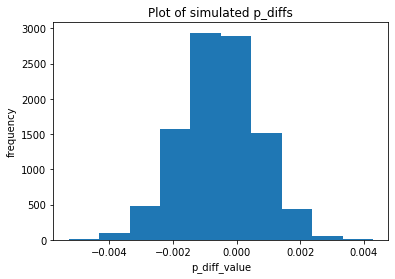

In [149]:
###plot the simulated differences
p_diffs = np.array(p_diffs)
plt.ylabel('frequency')
plt.xlabel('p_diff_value')
plt.title('Plot of simulated p_diffs')
plt.hist(p_diffs);

<font color='darkblue'>j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?</font>

In [150]:
obs_diff

-0.0015782389853555567

In [151]:
p_value = (p_diffs > obs_diff).mean()
p_value

0.8109

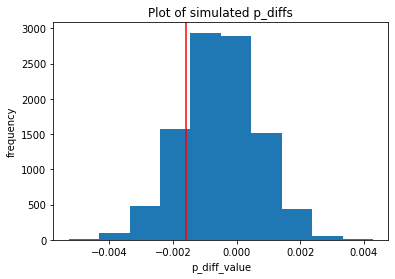

In [152]:
#plot the simulated differences
plt.hist(p_diffs);
plt.ylabel('frequency')
plt.xlabel('p_diff_value')
plt.title('Plot of simulated p_diffs')
plt.axvline(obs_diff,color = 'r');

<font color='darkblue'>k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?</font>

<font color='darkblue'>*We have calculated the p-value. It gives us the probablity of obtaining a sample "more extreme" than those observed in the data assumming the null hypothesis is true. Since we are conducting a left tail test (research hypothesis) $p_{old} - p_{new} < 0$, we expect these values to fall into the left side of our observed value (red line) to have our null hypothesis rejected. So it is calculated by finding the proportions of values in the null distribution, that were greater than our observed difference. The difference in means generated under null hypothesis shows the area on the histogramm that determine the statistical signifcance of the observed difference between new and old pages. Here we have almost all the values falling on the right side of the observed value, indicating now evidence against our null hypothesis that conversion rate under old page was more*</font>

<font color='darkblue'>*Thus the p-value has given us a 95% certainty of no evidence against our null hypothesis.  Therefore, the old pages have on average better conversion rate than the new page.</font>* 

<font color='darkblue'>l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.</font>

In [153]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "new_page"').shape[0]
n_new = df2.query('landing_page == "old_page"').shape[0]

n_old,convert_old,n_new,convert_new

(145310, 17489, 145274, 17264)

<font color='darkblue'>m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.</font>

In [154]:
###display the z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.2616957421858055, 0.8964708551967226)

In [155]:
### 95% confidence interval what is the z_score
from scipy.stats import norm
z_upper = norm.ppf(q = 0.975)
z_lower = norm.ppf(q = 0.025)
z_lower, z_upper

(-1.9599639845400545, 1.959963984540054)

<font color='darkblue'>n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?</font>

<font color='darkblue'>*Z-score measures how the standard deviation below and above the population mean a raw score is. Here we are testing null hypothesis at 95% confidence level. This sets the critical z score value at 1.9599. The z-score of the distribution of the data in ab_data.csv is 1.2616, less than the critical z score. Also, the p value computed is 0.8965, and greater than the Type-1 error threshold of 0.05. Hence, we fail to reject the null hypothesis. The finding here is quite different form the ones obtained from part j and k. In summary, based on the observed results, the we have no evidence against the null hypothesis*</font>

<font color='darkblue'>*Logistic regression will fit better given characteristics of the dataset we have. It has sigmoid function that range form 0-1*</font>

<font color='darkblue'>b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.</font>

In [156]:
###display information on the data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [157]:
# create an intercept, ab and drop column
df2[['treatment','control']] = pd.get_dummies(df2['group'])
df2.drop('treatment',axis=1,inplace=True)
df2 = df2.rename(columns={"control":"ab_page"})
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


<font color='darkblue'>c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.</font>

In [158]:
###import statistical packages
import statsmodels.api as sm
import scipy.stats as stats

In [159]:
###fit MLE logit model
logit_df2 = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

<font color='darkblue'>d. Provide the summary of your model below, and use it as necessary to answer the following questions.</font>

In [160]:
###display results
results = logit_df2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:55:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

<font color='darkblue'>e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?</font>

<font color='darkblue'>*p-value of ab_page in the logistic regression model is 0.190, whereas the p-value calculated in Part II is approximately 0.95. Generally, they are referring to the same thing, but using different approaches. The difference may be due the way the results of the hypotheses test were presented. In both cases, it was the alternative hypotheses that were tested. But the outcome of the results, was expressed differently.  In Part II, even though we tested for the alternative hypothesis (left tail test), output of the results centred around a normal distribution and expressed in relation with the null hypothesis. In the logistic regression, output of the results were explained using the alternative hypothesis as we had tested it.*</font>

<font color='darkblue'>**The regression model has hypothesis as follows:**</font>

<font color='darkblue'>*Null: There is no relationship between the converted and ab_page (takes a value 0 if the user received new_page or an old_page and did not convert)*</font>

<font color='darkblue'>*Alternative: There is a relationship between the converted and ab_page (takes 1 if the user received new_page, or the user received old_page and converts)*</font>

<font color='darkblue'>*Since the p-value in Logistic Regression Model is 0.190, we will not reject the null hypothesis that there is no relationship between conversion rate and the page user received. Furthermore, logistic model shows that there is an opposite relation between conversion and the page user received. However, using the p-value for our analysis we may ingore this relation though*</font>

<font color='darkblue'>**In the Part II A/B Testing the Null and Alternative hypothesis are as follows:**</font>

<font color='darkblue'>*Null: Average conversion rate for the old page is equal or greater than average conversion rate for new page.*</font>

<font color='darkblue'>*Alternative: Average conversion rate for the new_page is less than the average conversion rate for old page.*</font>

<font color='darkblue'>f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?</font>

<font color='darkblue'>*Adding additional variables may help uncover any other additional factors that may have contributed to conversion. Thus, it might help to understand the dependent factors for the predicted variable.*</font>

<font color='darkblue'>*On the other hand, adding additional variables may lead us to deviate from the hypothesis we want to prove in this A/B testing. Furthermore, these variables may lead to biased results, if there exist relationships between the independent variables. One such issue is that of multicollinnearity.*</font>

<font color='darkblue'>g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables.</font> 

<font color='darkblue'>Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.</font>

In [161]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [162]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [163]:
### create the necessary dummy variables
df_new[['CA', 'UK','US']] = pd.get_dummies(df_new['country'])
df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [164]:
df_new.drop(labels=['CA'], axis=1, inplace=True)

In [165]:
df_new.head(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [166]:
### fit MLE logit model
logit_df_new = sm.Logit(df_new['converted'], df_new[['intercept','UK', 'US']])
results1 = logit_df_new.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        15:55:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [167]:
###create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


<font color='darkblue'>*From the analysis we observe that the country variables for 'UK' and 'US' although they their coeffieints have positive relationship with conversion, their p_values indicate they are insignificant.*</font>

<font color='darkblue'>h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.</font>  

<font color='darkblue'>Provide the summary results, and your conclusions based on the results.</font>

In [168]:
###create interaction between page und country
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,0,1


In [169]:
### fit MLE logit model
logit_df_new = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page','US_ab_page','UK_ab_page']])
results2 = logit_df_new.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:               3.482e-05
Time:                        15:55:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

### <font color='darkblue'>Statistical Conclusion</font>

<font color='darkblue'>*Looking at the above analysis we see that all the independent variables are statistically insignificant. So we basically have no evidence against our null hypothesis.*</font>

<a id='conclusions'></a>
## <font color='darkblue'>Conclusions</font>
<font color='darkblue'>*In this project, we worked to understand the results of an A/B test run by an e-commerce website. The goal was to find out whether a new page leads to more users' conversions or not and make recommendations to the company.*</font>

<font color='darkblue'>*We began by first understanding and cleaning up the dataset. Then we calculated the probabilities for both the control and treatment groups along with their conversion rates. After this, we stipulated our research question by testing the alternative hypothesis that the  difference in conversion of the new page is lower than that of old page. This was done by using sampling distribution of 10000 samples from our dataset. From the obtained results, there was no evidence against our null hypothesis that the old page leads to more user conversion on average. This result was also confirmed by the alternative test by using z-score approach.*</font>

<font color='darkblue'>*After this, we performed the analysis by using regression approach. First, we fit the model by using logistic regression and performed our test to find out, if there was a significant difference in conversion based on which page a customer receives. Here also we no evidence against the null hypothesis that there is no relationship between conversion rate and the page user received.*</font>

<font color='darkblue'>*Furthermore, we weighed the options of adding other factors to model that might influence whether or not an individual convert, by stating some positive and negative arguments. We added an effect variable indicating the country a user lives in addition to the conversion rate changes for different pages. Finally, we created another two other models to test if interaction between page and country has significant effects on conversion.*</font>

<font color='darkblue'>*Our final conclusion is that, the company is well-off by keeping the old page.*</font>



### <font color='darkblue'><font>Resources</font>
- https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
- https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
- https://stackoverflow.com/questions/18575012/centering-text-in-ipython-notebook-markdown-heading-cells
- https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
- https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
- https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztost.html 
- https://www.omniconvert.com/what-is/conversion/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://numpy.org/doc/stable/reference/generated/numpy.exp.html
- https://www.youtube.com/watch?v=KLnGOL_AUgA
- https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/v/z-score-introduction